In [178]:
#!pip install sklearn
#!pip install pandas
#!pip install numpy

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

### **Iris Dataset (Sample Dataset)**
Popular classification dataset with 3 classes; setosa, virginica and versicolor.

We will choose 2 of the classes for the sample dataset

```
https://en.wikipedia.org/wiki/Iris_flower_data_set
```



In [2]:
iris_data = load_iris(return_X_y=False)

In [3]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df_iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

In [6]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
# Let's choose two of the classes; 'setosa', 'versicolor'; class 0 and class 1
df_iris_sample = df_iris[df_iris["target"] != 2]
df_iris_sample["target"].unique()

array([0., 1.])

In [8]:
df_iris_sample.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
df_iris_sample=df_iris_sample.sample(frac=1).reset_index(drop=True) # Shuffle the dataset

In [10]:
X = df_iris_sample[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].to_numpy()
y = df_iris_sample[['target']].to_numpy().ravel()

References:

Derivative of the Sigmoid function
https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

Understand to build a logistic regression from scratch
https://towardsdatascience.com/understand-and-build-logistic-regression-from-scratch-4ca4a7a40a4

Deep Dive into ML Algorithms - Logistic Regression

https://medium.com/analytics-vidhya/deep-dive-into-ml-algorithms-logistic-regression-4588ce8fa487

In [25]:
# 70/30 train-test split for our dataset

X_train=X[:int(len(X)*0.7)]
X_test=X[int(len(X)*0.7):]
y_train=y[:int(len(y)*0.7)]
y_test=y[int(len(y)*0.7):]

In [26]:
# Segmoid / Logistic function
def segmoid(x):
    if x.all()>=0:
        return 1/(1+np.exp(-x))
    else:
        return (np.exp(x) / (1+np.exp(x)))

$\epsilon$=1e-4

$\eta$=0.01

In [38]:
#Initial steps before forward propagation

cost_list=[] #List of costs for plotting
epochs=100 # Number of iterations
epsilon=0.0001 # Divergence criterea  
actual_iters=0 # For plotting the actual number of epochs if divergence occurs prior to the number of max epochs
W=np.random.randint(low=0,high=1000,size=X_train.shape[1]+1)/1000 #Random initilization of weight vector in addition to bias to keep it in one vector 
eta=0.01
x0=np.repeat(1, len(X_train)) # Generating an additional feature of 1s that will be concatinated to the dataset, which will help with bias calculation
new_x= np.c_[x0,X_train] # The feature of 1s is added to the matrix

In [39]:
#Forward propagation

for i in range(epochs):
    
    # Note that the bias (b) is already taken into account as its combined in the weight vector. Recall that we added a column of 1s to the training set 
    # and would be plugged in during the matrix multiplication.
    
    a=segmoid((W@new_x.T))     # a=Sigma(Z)= 1/1+exp^(-z) | Z= W.T * x+b note that we transposed X instead of W due to the order of matrix multiplication   
    
    cost= -1/len(y_train)*(np.sum(y_train*np.log(a) + (1-y_train)*np.log(1-a))) #Cost function J(w,b)
    print(cost)
    if len(cost_list)>1:
        if abs(cost_list[-1]-cost)<=epsilon:
            break
    cost_list.append(cost) # We append the cost to a list for plotting purposes
    actual_iters+=1  
   
    #Backpropagation

   
    dc_dw= -np.sum((y_train-a)*new_x.T, axis=-1)[np.newaxis,:] # This calculates the derivative of the sigmoid function np.newaxis is used to increase the dimension by 1 for matching the concatinated bias column / feature
    W=W-(dc_dw*eta) # The derivative of the segmoid function * learning rate (Eta) is deducted from the W vector across all datapoints


2.9943228228723906
4.705814778778756
3.2999401262847003
3.070296695880247
3.5728496089501416
1.4809774030827587
3.443673708722513
0.5499458336310026
0.974154834528308
0.8403142472855682
0.9013389084267105
0.20783190374823154
0.00506876695850948
0.004862486804572973
0.0047048176391108155
0.004582706680646823
0.0044869763157660775


In [32]:
1-segmoid(W@new_x.T)

array([[9.46998745e-04, 1.31486084e-02, 2.29541793e-03, 9.98365154e-01,
        9.60134483e-01, 9.95954323e-01, 2.22906615e-03, 9.98238311e-01,
        3.55265003e-03, 9.96227927e-01, 9.92790120e-01, 9.90694801e-01,
        3.70419996e-04, 9.91258794e-01, 1.61743310e-03, 1.47757037e-03,
        9.98335380e-01, 3.00216184e-04, 9.92252162e-01, 9.97570466e-01,
        1.06461736e-04, 4.31924795e-04, 9.93503316e-01, 1.08660176e-03,
        9.89625283e-01, 9.98247846e-01, 5.38734336e-04, 2.64906569e-04,
        1.42590168e-02, 9.97158347e-01, 9.92431226e-01, 9.96718164e-01,
        5.45869941e-05, 9.93406788e-01, 2.23103340e-03, 2.77865351e-03,
        9.99478194e-01, 9.95858463e-01, 1.95296831e-03, 9.97418329e-01,
        9.92542990e-01, 4.13196444e-02, 4.54602104e-04, 1.78781795e-03,
        9.81063954e-01, 1.14982747e-02, 1.47129956e-03, 1.82625448e-03,
        2.37808559e-03, 9.97593164e-01, 9.85059665e-01, 9.97891234e-01,
        2.33113090e-03, 1.30434981e-03, 3.29437838e-03, 9.978998

W [[-0.303496   -0.63725911 -2.33570381  3.65193275  1.6753839 ]]


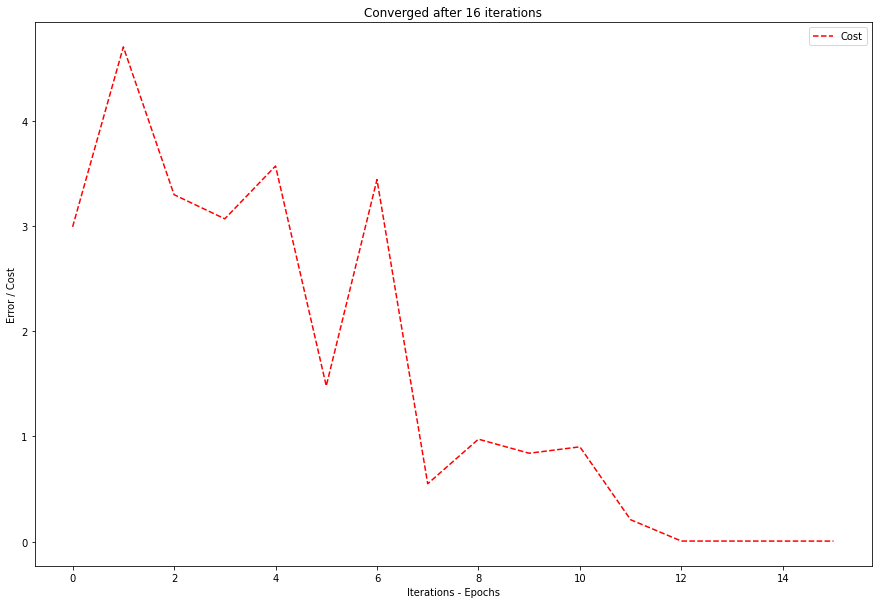

In [40]:
print('W',W) # Printing the weights
# Plotting the cost over epochs

plt.figure(figsize=(15,10))
plt.title('Converged after '+str(actual_iters)+' iterations')
plt.plot(range(actual_iters), cost_list, 'r--', label='Cost')
plt.xlabel('Iterations - Epochs')
plt.ylabel('Error / Cost')
plt.legend()
plt.show()

### Note that the model converged after 18 iterations as $\Delta$ L(w,j) was lower than threshold $\epsilon$ =1e-4 

In [288]:
# Applying the resulting W, b (one vector) to the test data
x0=np.repeat(1, len(X_test)) # Generating an additional feature of 1s that will be concatinated to the dataset, which will help with bias calculation
X_test= np.c_[x0,X_test] # The feature of 1s is added to the matrix
W=np.squeeze(W) # Get rid of single dimentional entries. In this case a [[n0,...,nm]] becomes [n0,...nm] - easier for coding
predictions=np.round((segmoid(W@X_test.T)),3)
predictions

array([0.984, 0.996, 0.016, 0.002, 0.021, 0.998, 0.963, 0.911, 0.005,
       0.997, 0.999, 0.005, 0.987, 0.999, 0.005, 0.004, 0.006, 0.995,
       0.01 , 0.964, 0.012, 0.966, 0.992, 0.01 , 0.989, 0.988, 0.999,
       0.006, 0.001, 0.007])

In [289]:
# np.where is used to apply simple classification based on the segmoid results e.g. class 0 if a is <0.50 and 1 otherwise 
np.where(predictions<0.5, 0,1) 

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0])

In [290]:
# We compare the results with the original test labels and see 100% accuracy for our logistic regression model
accuracy=np.where(predictions<0.5, 0,1)==y_test
accuracy

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [291]:
# Report on model accuracy
ctr=0
for result in accuracy:
    if result==True:
        ctr+=1
print('Model accuracy is', ctr/len(accuracy)*100,'%')

Model accuracy is 100.0 %
